In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# 일일히 graph의 font size를 지정할 필요 없이 seaborn 의 font_scale 사용

In [3]:
pip install missingno  # missingno 모듈 사용하기

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [4]:
import missingno as msno  # 모듈 불러오기

In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

< 앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다>
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다.
  하지만 가끔 null data가 존재합니다. 이를 확인하고 향후 수정합니다.
2. 탐색적 데이터 분석 - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관   계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature     들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트   데이터 처리 등을 합니다
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는     sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러   닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후,
  testset 을 가지고 prediction 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가   하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

## 1. 데이터셋 확인

- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
- 우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
- 캐글에서 데이터셋은 보통 train, testset 으로 나뉘어 있습니다.

 1. 데이터셋 확인 
  대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

In [7]:
df_train = pd.read_csv("./data/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test = pd.read_csv("./data/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# 각각의 feature => PassengerId, Survived, Sex, Age ...가 가진 통계치를 반환
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 1.1 Null data check

In [14]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [15]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- train, test set 에서 age (둘다 약 20%), cabin(둘다 약 80%), emvarked(train 만 0.22%) null data 존재하는 것을 볼 수 있습니다.
- MANO 라는 라이브러리를 사용하면 null data 의 존재를 더 쉽게 볼 수 있습니다.

In [16]:
df_train.shape

(891, 12)

In [17]:
df_train.iloc[:, :].shape

(891, 12)

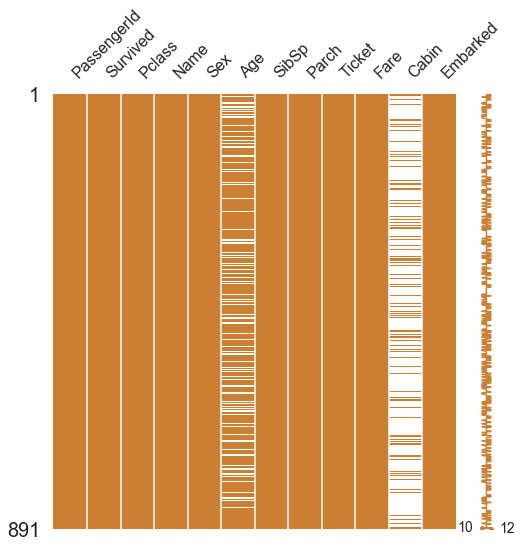

In [18]:
msno.matrix(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

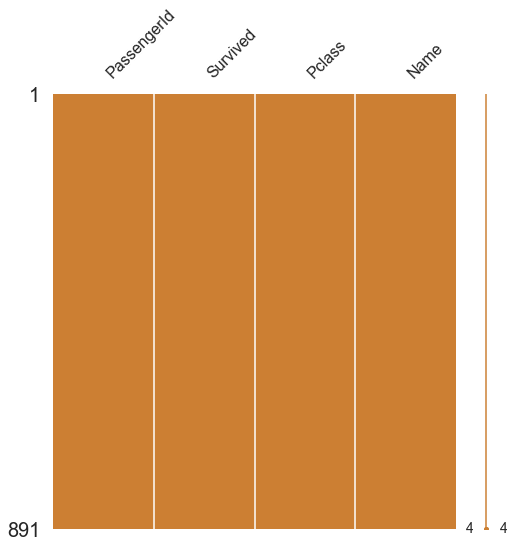

In [19]:
msno.matrix(df=df_train.iloc[:, :4], figsize=(8, 8), color=(0.8, 0.5, 0.2))
# 모든 행에 대하여 4번 열 데이터 전까지

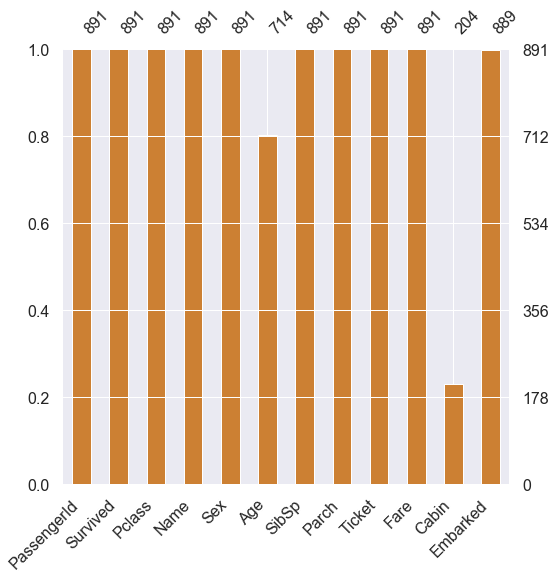

In [20]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

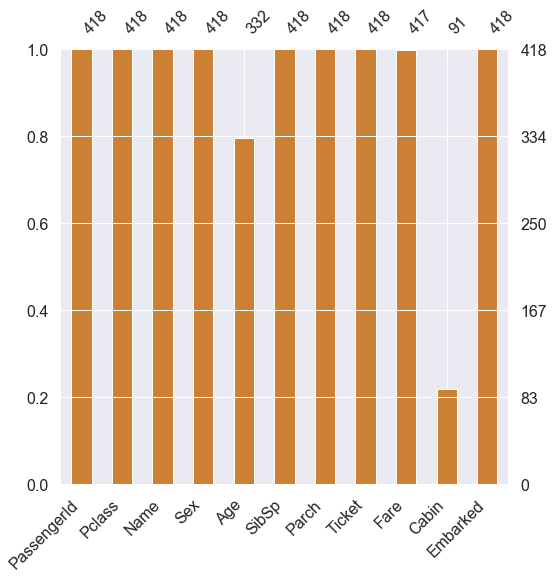

In [21]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

1.2 Target label 확인

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

In [22]:
df_train['Survived'].value_counts()
# 0 -> 사망
# 1 -> 생존

0    549
1    342
Name: Survived, dtype: int64

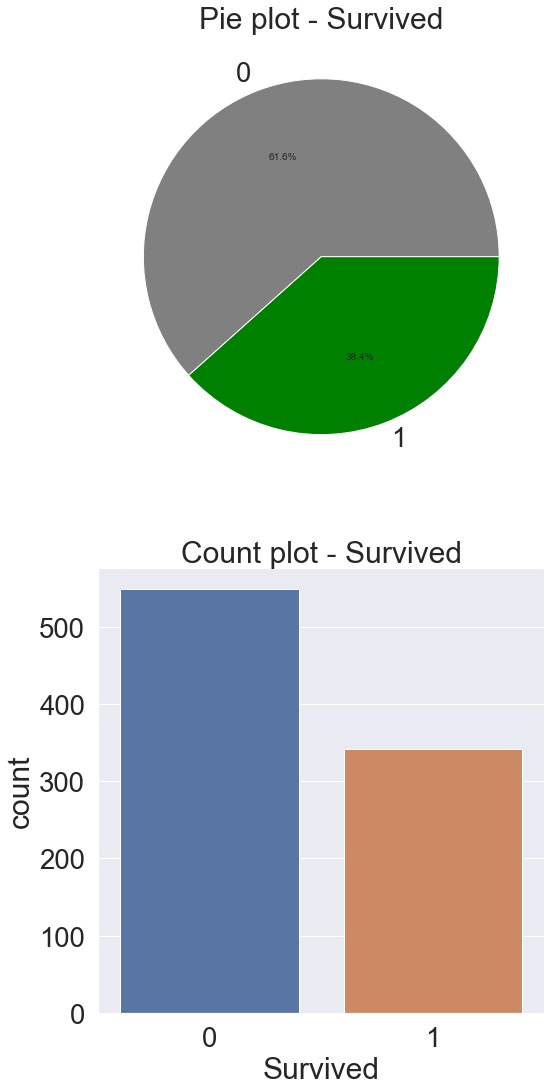

In [23]:
f, ax = plt.subplots(2, 1, figsize=(8, 18))
# 한 번에 여러개의 그래프를 그릴때, plt.subplots(행, 열) 을 이용한다
# plt.subplots 함수는 figure 객체를 생성하고, Figure.subplot()를 호출하여 리턴
df_train['Survived'].value_counts().plot.pie(explode=[0, 0],autopct='%1.1f%%',ax=ax[0], colors=['grey', 'green'])
# df_train 의 'Survived'에서 0 과 1의 개수 카운트해서 pie 그래프로 그리기
# value_counts() : 0 과 1의 개수 카운트하기
# explode -> 파이 조각이 돌출되는 크기(0이면 돌출되지 않음)
# autopct='%1.1f%%' -> 파이 조각 위에 표시될 글자 형태
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2.  Exploratory data analysis

- 본격적인 데이터 분석-> 적절한 시각화가 필요
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편함

2.1 Pclass
- Pclass 는 서수형 데이터 , 카테고리이면서, 순서가 있는 데이터 타이
- Pclass (1 -> 1등석, 2-> 2등석, 3 -> 3등석)
- 먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
- Pclass, 'Survived' 를 가져온 후, pclass로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다. 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [24]:
# 목표 : Pclass 별 생존자 수 구하기!

In [30]:
df_train[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# as_index=True 는 이 그룹을 인덱스로 지정할 것인지의 여부

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [31]:
# 각 Pclass 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [33]:
# pandas 의 crosstab을 사용하면 좀 더 위의 과정을 수월!(0:사망자, 1:생존자)
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [34]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [36]:
# 평균값 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# 자동으로 오름차순이지만 내림차순을 쓰고싶다면 ascending=False를 사용하면 됨

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


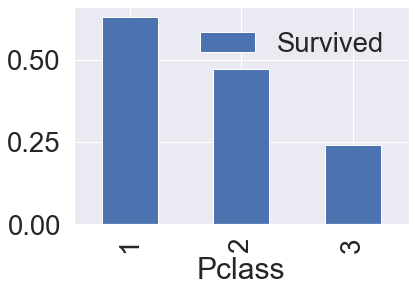

In [40]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [41]:
# Pclass 가 좋을 수록 생존률이 높은 것을 확인할 수 있다.
# 좀 더 보기 쉽게 그래프를 그려보자(seaborn, countplot을 이용)

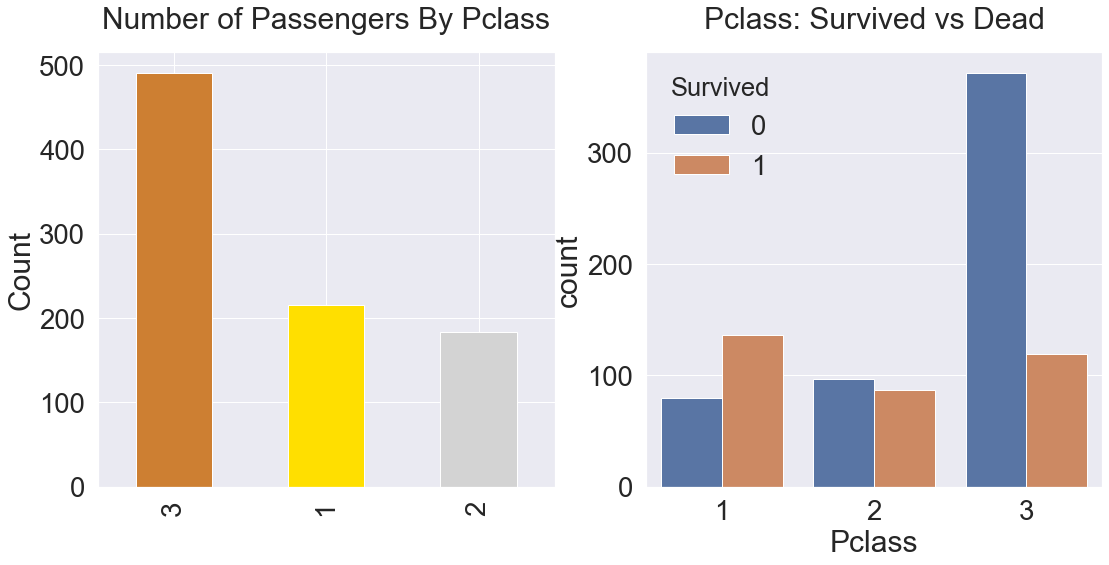

In [51]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=1.04)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=1.04)
plt.show()
# y=1.04 : 제목과 그래프 사이의 간격

In [ ]:
# 클래스가 높을 수록, 생존확률이 높은 것을 확인할 수 있다. 
# 따라서 생존에 클래스가 큰 영향을 미친다고 생각해볼 수 있으며,
# 나중에 모델을 세울 때, 이 feature을 사용하는 것이 좋을 것이라 판단.

## 2.2 Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.
- 마찬가리조 pandas groupby 와 seaborn countplot 을 사용해서 시각화해봅시다.

In [55]:
df_train[['Sex', 'Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


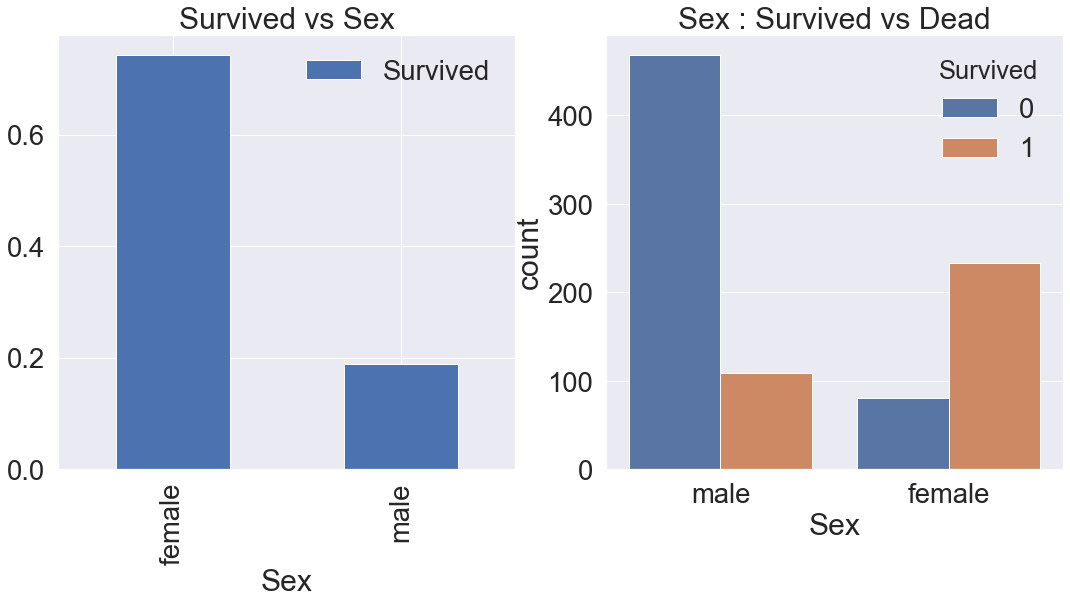

In [59]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

- 결과를 보니, 여자가 생존을 할 확률이 높다는 것을 알 수 있다.

In [63]:
# 성별로 생존자의 평균을 표로 나타내보자.
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [64]:
# 성별 생존자, 사망자, 총 인원을 표로 나타내기
pd.crosstab(df_train['Sex'],df_train['Survived'], margins =True )

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [65]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins =False)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [66]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins =True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 분석과 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.